#**Exploratory Data Analysis (EDA) Backup Dataset**
***Section:** B1* <br>
***Team:** 14* <br>
***Team Members:** Drishti Chulani, Arshdeep Singh Oberoi, Ahrar Karim, Vishesh Goyal* <br>
***Link to Colab Notebook:** [Click Here to Access the Colab Notebook](https://colab.research.google.com/drive/1H5f20DOXz4A_qzFyOtLbdqrMl2JZPwah?usp=sharing)* <br>
***Link to Github Repo:** [Click Here to Access the Github Repo](https://github.com/BackBencher2424/BA820_Team_14_Project)*

***Primary Dataset:** [ Bob Ross Paintings](https://github.com/rfordatascience/tidytuesday/tree/main/data/2023/2023-02-21)*

##**Step 1: Environment Setup and Data Loading**

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/bob_ross.csv')

# Display basic information
print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"Total Paintings: {len(df)}")
print(f"Total Features: {len(df.columns)}")
print(f"\nDataset Shape: {df.shape}")
print(f"\nColumn Names:\n{df.columns.tolist()}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DATASET OVERVIEW
Total Paintings: 403
Total Features: 27

Dataset Shape: (403, 27)

Column Names:
['painting_index', 'img_src', 'painting_title', 'season', 'episode', 'num_colors', 'youtube_src', 'colors', 'color_hex', 'Black_Gesso', 'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow', 'Dark_Sienna', 'Indian_Red', 'Indian_Yellow', 'Liquid_Black', 'Liquid_Clear', 'Midnight_Black', 'Phthalo_Blue', 'Phthalo_Green', 'Prussian_Blue', 'Sap_Green', 'Titanium_White', 'Van_Dyke_Brown', 'Yellow_Ochre', 'Alizarin_Crimson']


##**Step 2: Data Structure and Quality Assessment**

In [14]:
# Examine data types
print("\n" + "="*80)
print("DATA TYPES")
print("="*80)
print(df.dtypes)

# Check for missing values
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing_Count'] > 0])

# Check for duplicates
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

# Display first and last few rows
print("\n" + "="*80)
print("SAMPLE DATA (First 5 Rows)")
print("="*80)
print(df.head())

print("\n" + "="*80)
print("SAMPLE DATA (Last 5 Rows)")
print("="*80)
print(df.tail())



DATA TYPES
painting_index       int64
img_src             object
painting_title      object
season               int64
episode              int64
num_colors           int64
youtube_src         object
colors              object
color_hex           object
Black_Gesso           bool
Bright_Red            bool
Burnt_Umber           bool
Cadmium_Yellow        bool
Dark_Sienna           bool
Indian_Red            bool
Indian_Yellow         bool
Liquid_Black          bool
Liquid_Clear          bool
Midnight_Black        bool
Phthalo_Blue          bool
Phthalo_Green         bool
Prussian_Blue         bool
Sap_Green             bool
Titanium_White        bool
Van_Dyke_Brown        bool
Yellow_Ochre          bool
Alizarin_Crimson      bool
dtype: object

MISSING VALUES ANALYSIS
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []

Duplicate Rows: 0

SAMPLE DATA (First 5 Rows)
   painting_index                                            img_src  \
0             282  https://www.twoinch

##**Step 3: Analyze season and episodes**

In [15]:
print("\n" + "="*80)
print("TEMPORAL STRUCTURE ANALYSIS")
print("="*80)

print(f"Total Seasons: {df['season'].nunique()}")
print(f"Season Range: {df['season'].min()} to {df['season'].max()}")
print(f"\nEpisodes per Season:")
print(df.groupby('season')['episode'].agg(['min', 'max', 'count']))

# Check if any seasons have irregular episode counts
season_counts = df.groupby('season').size()
print(f"\nSeasons with non-standard episode count:")
print(season_counts[season_counts != 13])

# Create a chronological index
df['chronological_order'] = (df['season'] - 1) * 13 + df['episode']
print(f"\nChronological painting range: {df['chronological_order'].min()} to {df['chronological_order'].max()}")



TEMPORAL STRUCTURE ANALYSIS
Total Seasons: 31
Season Range: 1 to 31

Episodes per Season:
        min  max  count
season                 
1         1   13     13
2         1   13     13
3         1   13     13
4         1   13     13
5         1   13     13
6         1   13     13
7         1   13     13
8         1   13     13
9         1   13     13
10        1   13     13
11        1   13     13
12        1   13     13
13        1   13     13
14        1   13     13
15        1   13     13
16        1   13     13
17        1   13     13
18        1   13     13
19        1   13     13
20        1   13     13
21        1   13     13
22        1   13     13
23        1   13     13
24        1   13     13
25        1   13     13
26        1   13     13
27        1   13     13
28        1   13     13
29        1   13     13
30        1   13     13
31        1   13     13

Seasons with non-standard episode count:
Series([], dtype: int64)

Chronological painting range: 1 to 403


##**Step 4: Color Usage Analysis**

In [16]:
# Extract color columns (boolean columns)
color_columns = [col for col in df.columns if col not in ['painting_index', 'img_src',
                'painting_title', 'season', 'episode', 'num_colors', 'youtube_src',
                'colors', 'color_hex', 'chronological_order']]

print("\n" + "="*80)
print("COLOR USAGE ANALYSIS")
print("="*80)
print(f"Total Available Colors: {len(color_columns)}")
print(f"Color Names:\n{color_columns}")

# Calculate usage frequency for each color
color_usage = df[color_columns].sum().sort_values(ascending=False)
color_usage_pct = (color_usage / len(df)) * 100

color_summary = pd.DataFrame({
    'Paintings_Used': color_usage,
    'Usage_Percentage': color_usage_pct
})

print("\n" + "="*80)
print("COLOR FREQUENCY TABLE")
print("="*80)
print(color_summary)



COLOR USAGE ANALYSIS
Total Available Colors: 18
Color Names:
['Black_Gesso', 'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow', 'Dark_Sienna', 'Indian_Red', 'Indian_Yellow', 'Liquid_Black', 'Liquid_Clear', 'Midnight_Black', 'Phthalo_Blue', 'Phthalo_Green', 'Prussian_Blue', 'Sap_Green', 'Titanium_White', 'Van_Dyke_Brown', 'Yellow_Ochre', 'Alizarin_Crimson']

COLOR FREQUENCY TABLE
                  Paintings_Used  Usage_Percentage
Titanium_White               400         99.255583
Alizarin_Crimson             380         94.292804
Van_Dyke_Brown               371         92.059553
Cadmium_Yellow               346         85.856079
Yellow_Ochre                 327         81.141439
Phthalo_Blue                 323         80.148883
Bright_Red                   321         79.652605
Midnight_Black               317         78.660050
Sap_Green                    306         75.930521
Indian_Yellow                292         72.456576
Dark_Sienna                  290         71.960298
Prussian_

##**Step 5: Color Usage Visualizations**

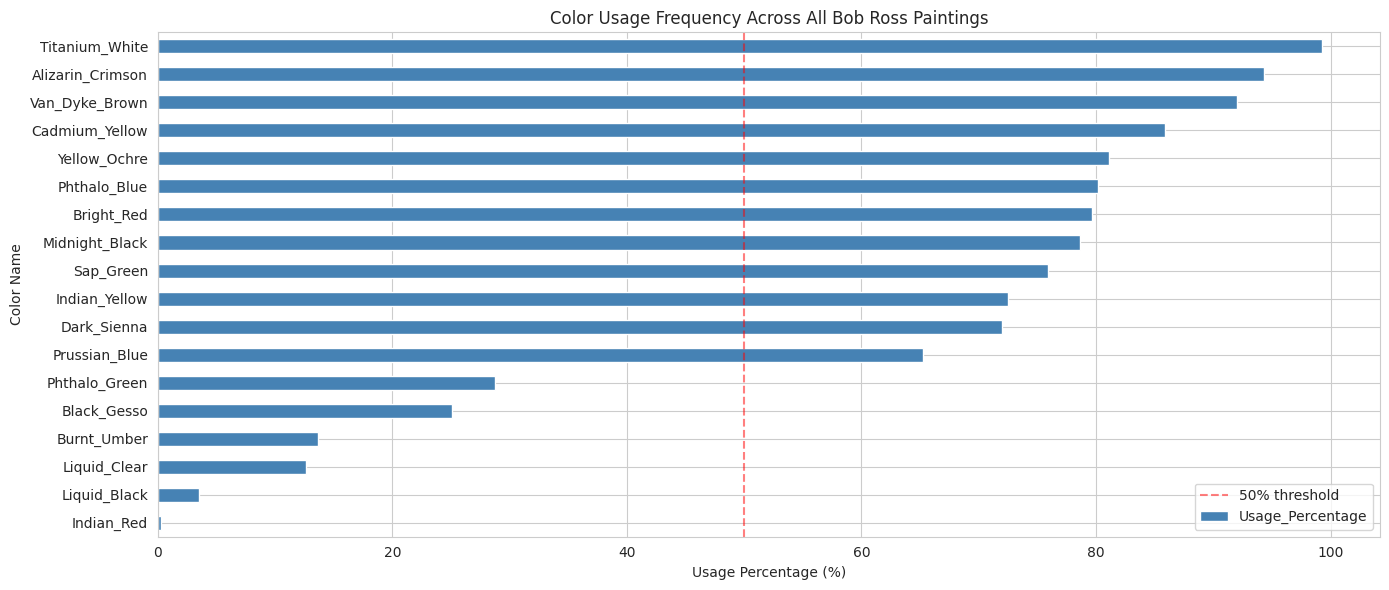

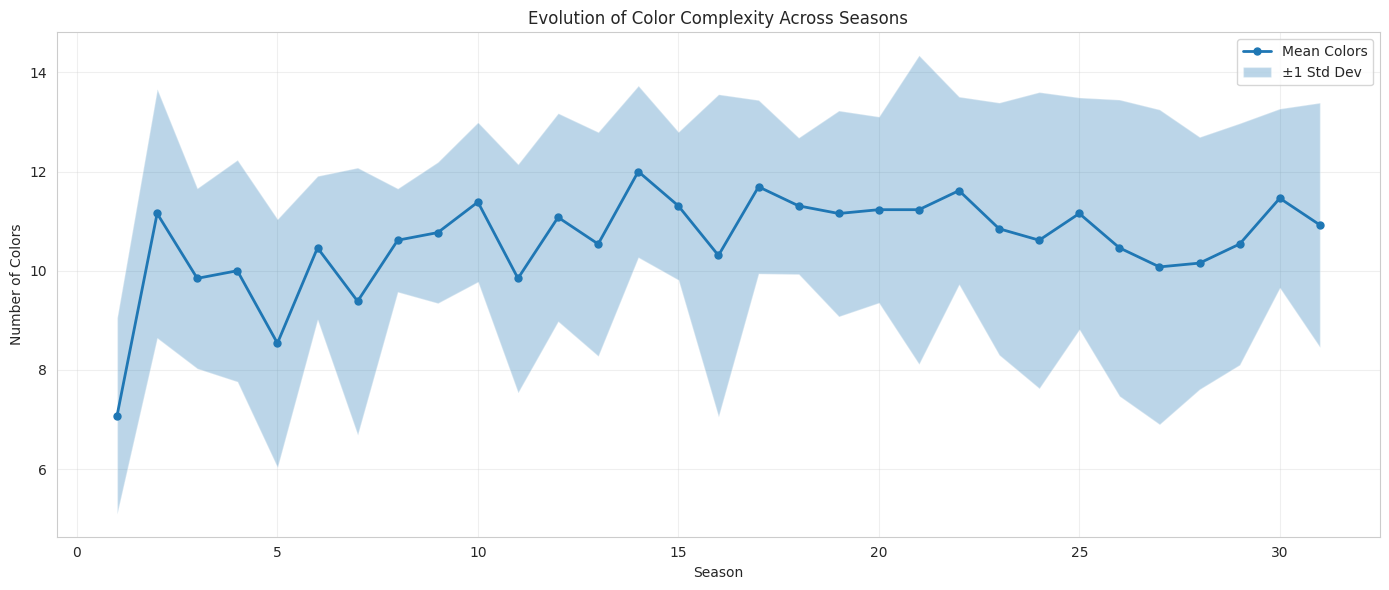

In [17]:
# Visualization 1: Color usage frequency bar plot
fig, ax = plt.subplots(figsize=(14, 6))
color_summary.sort_values('Usage_Percentage', ascending=True).plot(
    kind='barh',
    y='Usage_Percentage',
    ax=ax,
    color='steelblue',
    legend=False
)
ax.set_xlabel('Usage Percentage (%)')
ax.set_ylabel('Color Name')
ax.set_title('Color Usage Frequency Across All Bob Ross Paintings')
ax.axvline(50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Visualization 2: Temporal trend - colors over seasons
season_color_trend = df.groupby('season')['num_colors'].agg(['mean', 'std', 'min', 'max'])

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(season_color_trend.index, season_color_trend['mean'],
        marker='o', linewidth=2, markersize=5, label='Mean Colors')
ax.fill_between(season_color_trend.index,
                season_color_trend['mean'] - season_color_trend['std'],
                season_color_trend['mean'] + season_color_trend['std'],
                alpha=0.3, label='±1 Std Dev')
ax.set_xlabel('Season')
ax.set_ylabel('Number of Colors')
ax.set_title('Evolution of Color Complexity Across Seasons')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


##**Step 6: Color Usage Matrix**


COLOR CO-OCCURRENCE CORRELATION MATRIX


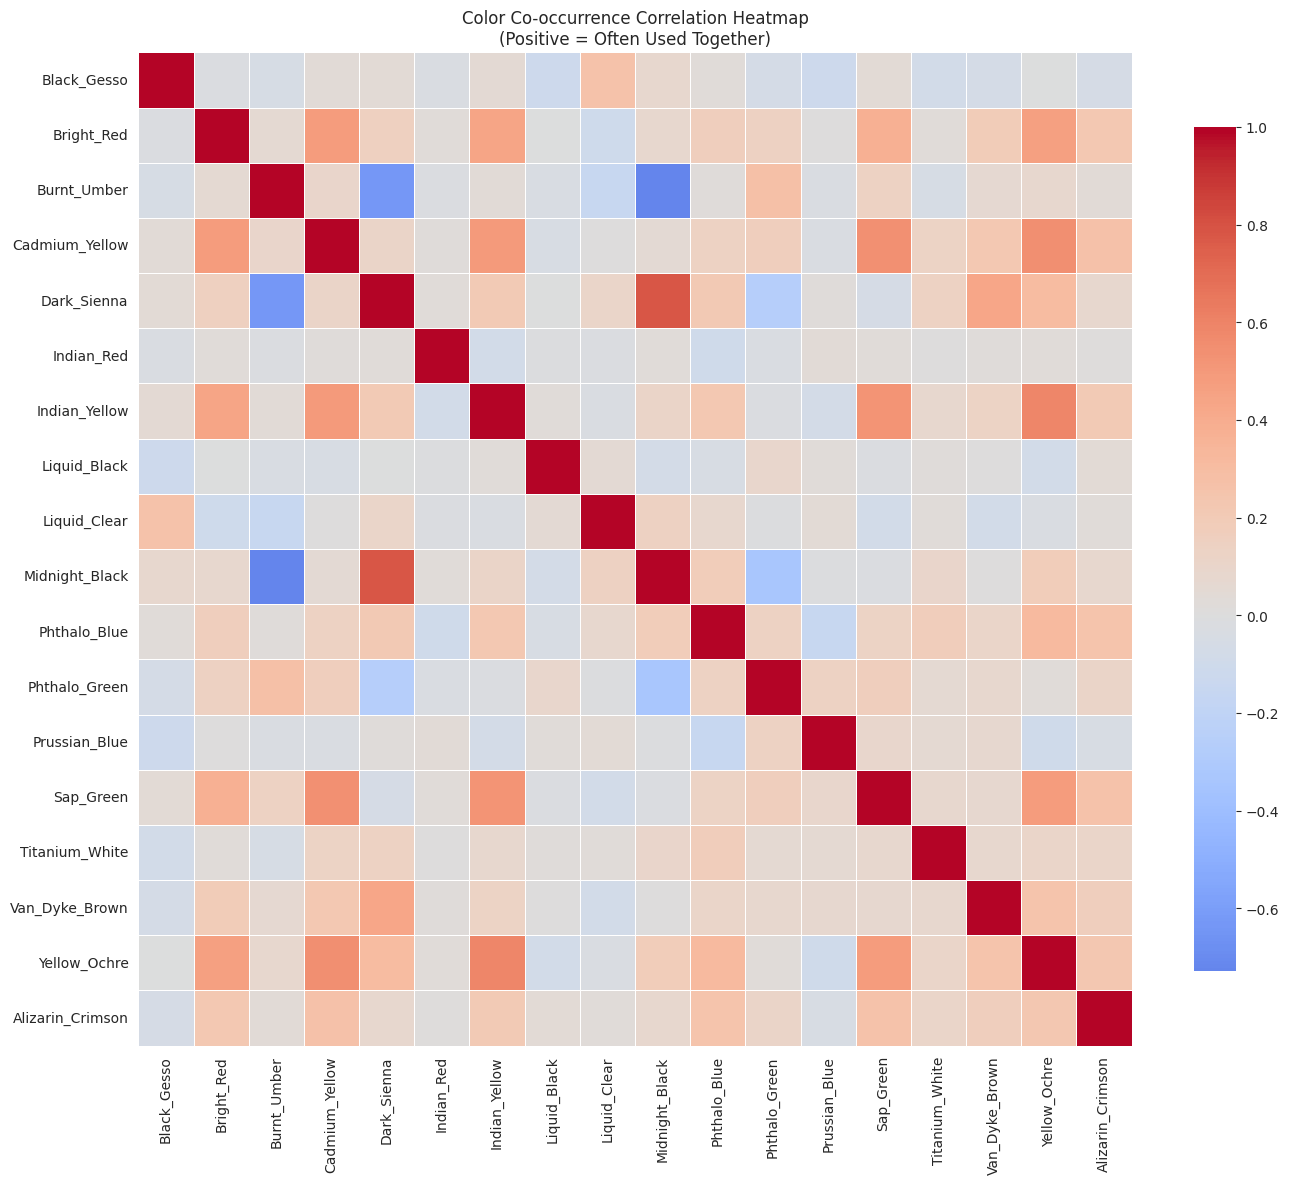


Top 10 Color Pairs (Most Frequently Used Together):
            Color_1         Color_2  Correlation
66      Dark_Sienna  Midnight_Black     0.780478
96    Indian_Yellow    Yellow_Ochre     0.583129
60   Cadmium_Yellow    Yellow_Ochre     0.550660
57   Cadmium_Yellow       Sap_Green     0.537677
93    Indian_Yellow       Sap_Green     0.523391
50   Cadmium_Yellow   Indian_Yellow     0.498913
145       Sap_Green    Yellow_Ochre     0.485312
18       Bright_Red  Cadmium_Yellow     0.484677
31       Bright_Red    Yellow_Ochre     0.465389
21       Bright_Red   Indian_Yellow     0.433432

Top 10 Color Pairs (Least Frequently Used Together):
            Color_1         Color_2  Correlation
79       Indian_Red    Phthalo_Blue    -0.100217
23       Bright_Red    Liquid_Clear    -0.104242
11      Black_Gesso   Prussian_Blue    -0.107184
6       Black_Gesso    Liquid_Black    -0.109710
38      Burnt_Umber    Liquid_Clear    -0.151323
126    Phthalo_Blue   Prussian_Blue    -0.154059
68      Dar

In [18]:
# Create a color usage matrix
color_matrix = df[color_columns].astype(int)

# Calculate correlation matrix for color co-occurrence
print("\n" + "="*80)
print("COLOR CO-OCCURRENCE CORRELATION MATRIX")
print("="*80)
color_corr = color_matrix.corr()

# Visualization 3: Correlation heatmap
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(color_corr, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
ax.set_title('Color Co-occurrence Correlation Heatmap\n(Positive = Often Used Together)')
plt.tight_layout()
plt.show()

# Identify strongest positive and negative correlations
corr_pairs = []
for i in range(len(color_corr.columns)):
    for j in range(i+1, len(color_corr.columns)):
        corr_pairs.append({
            'Color_1': color_corr.columns[i],
            'Color_2': color_corr.columns[j],
            'Correlation': color_corr.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs).sort_values('Correlation', ascending=False)

print("\nTop 10 Color Pairs (Most Frequently Used Together):")
print(corr_df.head(10))

print("\nTop 10 Color Pairs (Least Frequently Used Together):")
print(corr_df.tail(10))


##****Step 7: Summary Statistics****

In [19]:
# Create comprehensive summary for report
summary_stats = {
    'Total_Paintings': len(df),
    'Total_Seasons': df['season'].nunique(),
    'Available_Colors': len(color_columns),
    'Avg_Colors_Per_Painting': df['num_colors'].mean(),
    'Std_Colors_Per_Painting': df['num_colors'].std(),
    'Min_Colors': df['num_colors'].min(),
    'Max_Colors': df['num_colors'].max(),
    'Most_Common_Color': color_usage.idxmax(),
    'Most_Common_Color_Usage_Pct': color_usage_pct.max(),
    'Least_Common_Color': color_usage.idxmin(),
    'Least_Common_Color_Usage_Pct': color_usage_pct.min()
}

summary_df = pd.DataFrame([summary_stats]).T
summary_df.columns = ['Value']

print("\n" + "="*80)
print("FINAL SUMMARY STATISTICS")
print("="*80)
print(summary_df)


FINAL SUMMARY STATISTICS
                                       Value
Total_Paintings                          403
Total_Seasons                             31
Available_Colors                          18
Avg_Colors_Per_Painting            10.605459
Std_Colors_Per_Painting             2.378525
Min_Colors                                 1
Max_Colors                                15
Most_Common_Color             Titanium_White
Most_Common_Color_Usage_Pct        99.255583
Least_Common_Color                Indian_Red
Least_Common_Color_Usage_Pct        0.248139


##****Step 8: Skewness****


DISTRIBUTION ANALYSIS

Color Count: Mean=10.6, Median=11.0, Skewness=-1.01
FINDING: LEFT-SKEWED - Most paintings use many colors

 RARE colors (<10% usage): ['Liquid_Black', 'Indian_Red']
 COMMON colors (>80% usage): ['Titanium_White', 'Alizarin_Crimson', 'Van_Dyke_Brown', 'Cadmium_Yellow', 'Yellow_Ochre', 'Phthalo_Blue']

 SURPRISING: 6 colors dominate palette - 'core palette' strategy evident


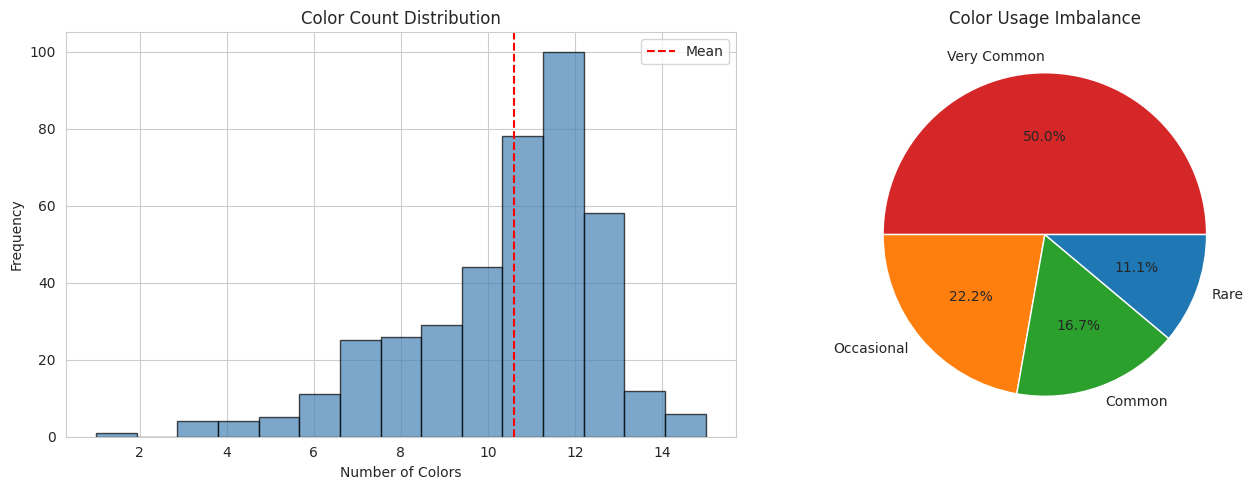

In [20]:
##*Skewness

from scipy.stats import skew

print("\n" + "="*80)
print("DISTRIBUTION ANALYSIS")
print("="*80)

# Analyze num_colors distribution
skewness = skew(df['num_colors'])
print(f"\nColor Count: Mean={df['num_colors'].mean():.1f}, Median={df['num_colors'].median():.1f}, Skewness={skewness:.2f}")

if skewness > 0.5:
    print("FINDING: RIGHT-SKEWED - Most paintings use fewer colors")
elif skewness < -0.5:
    print("FINDING: LEFT-SKEWED - Most paintings use many colors")

# Identify color imbalances
color_usage = df[color_columns].sum().sort_values(ascending=False)
rare_colors = color_usage[color_usage < len(df) * 0.10]
common_colors = color_usage[color_usage > len(df) * 0.80]

print(f"\n RARE colors (<10% usage): {list(rare_colors.index)}")
print(f" COMMON colors (>80% usage): {list(common_colors.index)}")
print(f"\n SURPRISING: {len(common_colors)} colors dominate palette - 'core palette' strategy evident")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['num_colors'], bins=15, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['num_colors'].mean(), color='red', linestyle='--', label='Mean')
axes[0].set_xlabel('Number of Colors')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Color Count Distribution')
axes[0].legend()

usage_counts = pd.cut(color_usage, bins=[0, 50, 150, 300, 500],
                      labels=['Rare', 'Occasional', 'Common', 'Very Common']).value_counts()
axes[1].pie(usage_counts, labels=usage_counts.index, autopct='%1.1f%%',
            colors=['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4'])
axes[1].set_title('Color Usage Imbalance')

plt.tight_layout()
plt.show()


## Observations and Insights

**Skewness & Imbalance**
The color usage distribution is highly skewed, with a small number of colors dominating most paintings and a long tail of rarely used colors. This indicates a strong imbalance between core palette colors and accent colors.

**Co-occurrence Patterns**
Certain colors consistently appear together, suggesting a stable foundational palette structure rather than random color selection.

**Outliers & Anomalies**
A small number of paintings exhibit unusually large or small palettes, making them stylistic outliers compared to the dominant pattern of moderate palette sizes.

**Interesting / Surprising Patterns**
It is interesting that despite the large number of available colors, Bob Ross paintings rely on a relatively consistent core palette.
It is surprising how rarely some colors appear, suggesting they function as stylistic accents rather than standard components.
It is unclear whether seasonal variation reflects stylistic evolution or production constraints.

**Interpretive Summary**
Overall, the dataset shows strong structural consistency, with limited palette diversity, stable co-occurrence patterns, and rare but identifiable anomalies.
